# IPCC AR6 Interactive Atlas Datalab

***

> This notebook is a reproducibility example of the IPCC-WGI AR6 Interactive Atlas products. This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0).
>
> ![Creative Commons License >](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Getting Started

**M. Iturbide** and **L. Sitz** (Santander Meteorology Group. Institute of Physics of Cantabria, CSIC-UC, Spain).

**Welcome to the datalab "Getting Started" notebook!** This guideline is structured to assist you in harnessing the wealth of resources available within the **IPCC AR6 Interactive Atlas Datalab**, enabling you to conduct meaningful climate research and analysis. The datalab serves as a **reproducibility platform for the IPCC-WG-AR6 Interactive Atlas products**, facilitating not only the reproducibility but also the **reusability of the underlying data**. It offers **transparent access to a wide range of climate-related materials and data**, thereby promoting robust scientific investigations and supporting climate change assessment efforts.

This guideline is divided into several sections. We will begin by outlining the overarching aim and motivation behind the datalab, clarifying its purpose and significance in the realm of climate research. Subsequently, we delve into the Description of the available material within the datalab, providing insights into the diverse datasets and resources at your disposal for climate analysis. Finally, in the section on Data loading and basic data operations, **we walk you through the fundamental steps required to start working with climate data effectively**.

### Contents in this notebook
1) Aim and motivation
2) Description of the available material within the datalab
3) Data loading and basic data operations
   * 3.1. Library loading
   * 3.2. Data loading
   * 3.3. The structure of the *climate4R* grid
   * 3.4. Initial Data Exploration Plots
   * 3.5. Calculation of anomalies (future projections - historical simulations)
   * 3.6. Spatial aggregation
***

Before we start, or at any stage of the notebook, we can customize the plotting area within this notebook as follows:

In [1]:
library(repr)
# Change plot size 
options(repr.plot.width=18, repr.plot.height=8)

Warning message:
“package ‘repr’ was built under R version 4.3.3”


***

### 1. Aim and motivation

The **IPCC AR6 Interactive Atlas Datalab** aims to **support the reproducibility and reusability** of the data underlying the Interactive Atlas of the IPCC-WGI. It leverages the latest technologies to provide an **efficient research environment that accelerates data analysis**. This is achieved by integrating **data storage and computational resources with ready-to-use software frameworks**. By utilizing these new technologies, climate data analysis can become more efficient, and the legacy of project results can be extended for the benefit of society. 

### 2. Description of the available material within the datalab

The datalab is more than just a computing resource; it encompasses **data (including NcML catalogs), software, and notebooks** that facilitate the reproducibility of the IPCC-WGI AR6 Atlas results. Additionally, this material enables the reusability of data, thereby extending the analysis provided by the IPCC-WGI Interactive Atlas.

#### Software

The datalab comes with **pre-installed ready-to-use software** for managing and performing operations with climate data. This software is a collection of **R packages** known as the **`climate4R`** framework (Iturbide et al., 2019. DOI: [10.1016/j.envsoft.2018.09.009](https://www.sciencedirect.com/science/article/pii/S1364815218303049?via%3Dihub)), which can be selected from the kernel menu. Go to [the climate4R GitHub repository](https://github.com/SantanderMetGroup/climate4R) for more information.

For Python users, there is also a **`python 3`** environment available. It's worth noting, however, that in this case, the pre-installed software is more basic.

The core ***climate4R*** libraries that allow for **data loading, transformation** (e.g. spatio-temporal aggregations), and **visualization** are `loadeR`, `transformeR` and `visualizeR`. 


In [2]:
library(loadeR)
library(transformeR)
library(visualizeR)

Warning message:
“package ‘loadeR’ was built under R version 4.3.3”
Loading required package: rJava

Warning message:
“package ‘rJava’ was built under R version 4.3.3”
Loading required package: loadeR.java

Warning message:
“package ‘loadeR.java’ was built under R version 4.3.3”
Java version 20x amd64 by N/A detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: climate4R.UDG

Warning message:
“package ‘climate4R.UDG’ was built under R version 4.3.2”
climate4R.UDG version 0.2.6 (2023-06-26) is loaded

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.8.2 (2024-06-04) is loaded

Please use 'citation("loadeR")' to cite this package.

Warning message:
“package ‘transformeR’ was built under R version 4.3.3”



    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded


Get the latest stable version (2.2.3) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

Warning message:
“package ‘visualizeR’ was built under R version 4.3.2”
visualizeR version 1.6.4 (2023-10-26) is loaded

Please see 'citation("visualizeR")' to cite this package.



However, the software includes the entire *climate4R* framework and other useful libraries. For instance, it includes the powerful plotting library `lattice` or the `magrittr` library for piping operations (through `%>%`).

In [3]:
library(lattice)
library(magrittr)

Warning message:
“package ‘lattice’ was built under R version 4.3.3”
Warning message:
“package ‘magrittr’ was built under R version 4.3.3”


#### Data

The inventory (`inventory.csv`) catalogs the list of files of the [**the IPCC-WGI AR6 Interactive Atlas Dataset**](https://interactive-atlas.ipcc.ch/), originally published at [**DIGITAL.CSIC**](https://digital.csic.es/handle/10261/280324) for the long-term archival, and also available through the Copernicus Data Store (**CDS**). 

In [4]:
df <- read.csv("../inventory.csv")
head(df)

,location,type,variable,project,experiment,frequency
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,https://hub.climate4r.ifca.es/thredds/dodsC/ipcc/ar6/atlas/ia-monthly/CORDEX-ANT/historical/pr_CORDEX-ANT_historical_mon_197001-200512.nc,opendap,pr,CORDEX-ANT,historical,mon
2,https://hub.climate4r.ifca.es/thredds/dodsC/ipcc/ar6/atlas/ia-monthly/CORDEX-ANT/historical/tn_CORDEX-ANT_historical_mon_197001-200512.nc,opendap,tn,CORDEX-ANT,historical,mon
3,https://hub.climate4r.ifca.es/thredds/dodsC/ipcc/ar6/atlas/ia-monthly/CORDEX-ANT/historical/rx1day_CORDEX-ANT_historical_mon_197001-200512.nc,opendap,rx1day,CORDEX-ANT,historical,mon
4,https://hub.climate4r.ifca.es/thredds/dodsC/ipcc/ar6/atlas/ia-monthly/CORDEX-ANT/historical/tx_CORDEX-ANT_historical_mon_197001-200512.nc,opendap,tx,CORDEX-ANT,historical,mon
5,https://hub.climate4r.ifca.es/thredds/dodsC/ipcc/ar6/atlas/ia-monthly/CORDEX-ANT/historical/txx_CORDEX-ANT_historical_mon_197001-200512.nc,opendap,txx,CORDEX-ANT,historical,mon
6,https://hub.climate4r.ifca.es/thredds/dodsC/ipcc/ar6/atlas/ia-monthly/CORDEX-ANT/historical/tnn_CORDEX-ANT_historical_mon_197001-200512.nc,opendap,tnn,CORDEX-ANT,historical,mon


We can easily display a **data inventory** of the data with the `dataInventory` function from the `loadeR` package. For instance:

In [5]:
subset <- subset(df, project == "CMIP6" & variable == "pr" & experiment == "historical" & type == "opendap")
location <- subset$location

In [6]:
di <- dataInventory(location)

[2024-10-04 11:02:56.961666] Doing inventory ...

[2024-10-04 11:02:57.076561] Opening dataset...

[2024-10-04 11:02:58.316411] The dataset was successfuly opened

[2024-10-04 11:02:58.620084] Retrieving info for 'pr' (0 vars remaining)

[2024-10-04 11:02:58.697743] Done.



In [7]:
di$pr$Dimensions$member

$Type
[1] "Ensemble"

$Units
[1] ""

$Values
 [1] "CSIRO-ARCCSS_ACCESS-CM2_r1i1p1f1"             
 [2] "CSIRO_ACCESS-ESM1-5_r1i1p1f1"                 
 [3] "BCC_BCC-CSM2-MR_r1i1p1f1"                     
 [4] "CAMS_CAMS-CSM1-0_r2i1p1f1"                    
 [5] "NCAR_CESM2-WACCM_r1i1p1f1"                    
 [6] "NCAR_CESM2_r4i1p1f1"                          
 [7] "CMCC_CMCC-CM2-SR5_r1i1p1f1"                   
 [8] "CNRM-CERFACS_CNRM-CM6-1-HR_r1i1p1f2"          
 [9] "CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2"             
[10] "CNRM-CERFACS_CNRM-ESM2-1_r1i1p1f2"            
[11] "CCCma_CanESM5_r1i1p1f1"                       
[12] "EC-Earth-Consortium_EC-Earth3-Veg-LR_r1i1p1f1"
[13] "EC-Earth-Consortium_EC-Earth3-Veg_r1i1p1f1"   
[14] "EC-Earth-Consortium_EC-Earth3_r1i1p1f1"       
[15] "CAS_FGOALS-g3_r1i1p1f1"                       
[16] "NOAA-GFDL_GFDL-CM4_r1i1p1f1"                  
[17] "NOAA-GFDL_GFDL-ESM4_r1i1p1f1"                 
[18] "MOHC_HadGEM3-GC31-LL_r1i1p1f3"                
[19] "CCCR-IITM_IITM-ESM_r1i1p1f1"                  
[20] "INM_INM-CM4-8_r1i1p1f1"                       
[21] "INM_INM-CM5-0_r1i1p1f1"                       
[22] "IPSL_IPSL-CM6A-LR_r1i1p1f1"                   
[23] "NIMS-KMA_KACE-1-0-G_r2i1p1f1"                 
[24] "KIOST_KIOST-ESM_r1i1p1f1"                     
[25] "MIROC_MIROC-ES2L_r1i1p1f2"                    
[26] "MIROC_MIROC6_r1i1p1f1"                        
[27] "MPI-M_MPI-ESM1-2-HR_r1i1p1f1"                 
[28] "MPI-M_MPI-ESM1-2-LR_r1i1p1f1"                 
[29] "MRI_MRI-ESM2-0_r1i1p1f1"                      
[30] "NUIST_NESM3_r1i1p1f1"                         
[31] "NCC_NorESM2-LM_r1i1p1f1"                      
[32] "NCC_NorESM2-MM_r1i1p1f1"                      
[33] "AS-RCEC_TaiESM1_r1i1p1f1"                     
[34] "MOHC_UKESM1-0-LL_r1i1p1f2"

Or the description of the index, the corresponding units and the time resolution.

In [8]:
di$pr$Description
di$pr$Units
di$pr$Dimensions$time

[1] "Monthly mean of daily accumulated precipitation"

[1] "mm"

$Type
[1] "Time"

$TimeStep
[1] "30.436 days"

$Units
[1] "days since 1850-01-01 00:00:00"

$Date_range
[1] "1850-01-01T00:00:00Z - 2014-12-01T00:00:00Z"

### 3. Data loading and basic data operations


Data loading is performed using the `loadGridData` function, which allows you to specify a NetCDF file or an NcML catalog as the data source.

In [9]:
cmip6.hist <- loadGridData(dataset = location,
             var = "pr",
             lonLim = c(-10, 4), latLim = c(36, 44),
             season = 6:8,
             years = 1850:1900)

[2024-10-04 11:02:58.922101] Opening dataset...

[2024-10-04 11:02:59.323817] The dataset was successfuly opened

[2024-10-04 11:02:59.332784] Defining geo-location parameters

[2024-10-04 11:02:59.388549] Defining time selection parameters

[2024-10-04 11:02:59.420264] Retrieving data subset ...

[2024-10-04 11:03:11.721912] Done



The `var` parameter also needs to be specified, in this example as `pr` (mean precipitation). Note that `loadGridData` also allows for other parameter settings. We have used `lonLim` and `latLim` to load only the subset of the data over the Iberian Peninsula, and `season` to load data for JJA (the summer months in the north hemisphere). In the `years` parameter, we can specify the desired period (here preindustrial). Run `help(loadGridData)` to check other available parameters.

#### 3.3. The structure of the *climate4R* `grid`
The resulting object (here named `cmip6.hist`) is a *climate4R* *grid*, this is a `list` object containint the following slots: `Variable, Data, xyCoordinates, Dates and Members`. The `InitializationDates` slot can be ignored here, as it is related to seasonal projections. 

In [10]:
str(cmip6.hist)

List of 6
 $ Variable           :List of 2
  ..$ varName: chr "pr"
  ..$ level  : NULL
  ..- attr(*, "use_dictionary")= logi FALSE
  ..- attr(*, "description")= chr "Monthly mean of daily accumulated precipitation"
  ..- attr(*, "units")= chr "mm"
  ..- attr(*, "longname")= chr "pr"
  ..- attr(*, "daily_agg_cellfun")= chr "none"
  ..- attr(*, "monthly_agg_cellfun")= chr "none"
  ..- attr(*, "verification_time")= chr "none"
 $ Data               : num [1:34, 1:153, 1:9, 1:15] 0.0801 0.832 1.7773 0.0732 0.2559 ...
  ..- attr(*, "dimensions")= chr [1:4] "member" "time" "lat" "lon"
 $ xyCoords           :List of 2
  ..$ x: num [1:15] -9.5 -8.5 -7.5 -6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5 ...
  ..$ y: num [1:9] 36.5 37.5 38.5 39.5 40.5 41.5 42.5 43.5 44.5
  ..- attr(*, "projection")= chr "LatLonProjection"
  ..- attr(*, "resX")= num 1
  ..- attr(*, "resY")= num 1
 $ Dates              :List of 2
  ..$ start: chr [1:153] "1850-06-01 00:00:00 GMT" "1850-07-01 00:00:00 GMT" "1850-08-01 00:00:00 GMT

Therefore, the information can be extracted using `$`. For instance, the data array can be extracted as follows:

In [11]:
data.array <- cmip6.hist$Data %>% str

 num [1:34, 1:153, 1:9, 1:15] 0.0801 0.832 1.7773 0.0732 0.2559 ...
 - attr(*, "dimensions")= chr [1:4] "member" "time" "lat" "lon"


However, **as the *climate4R* functions work with the `grid` structure transparently, there is no need to extract any component of the list to perform different transformation and visualization operations.**

#### 3.4. Initial Data Exploration Plots
Before we continue we can take a look at the data by, for instance, plotting maps. To do so we first compute the climatology with function `climatology` from the `transformeR` package. Finally, we use the `spatialPlot` function from the `visualizeR` package (run `help(spatialPlot)` to check different plotting parameters).

[2024-10-04 11:03:11.787489] - Computing climatology...

[2024-10-04 11:03:11.840963] - Done.



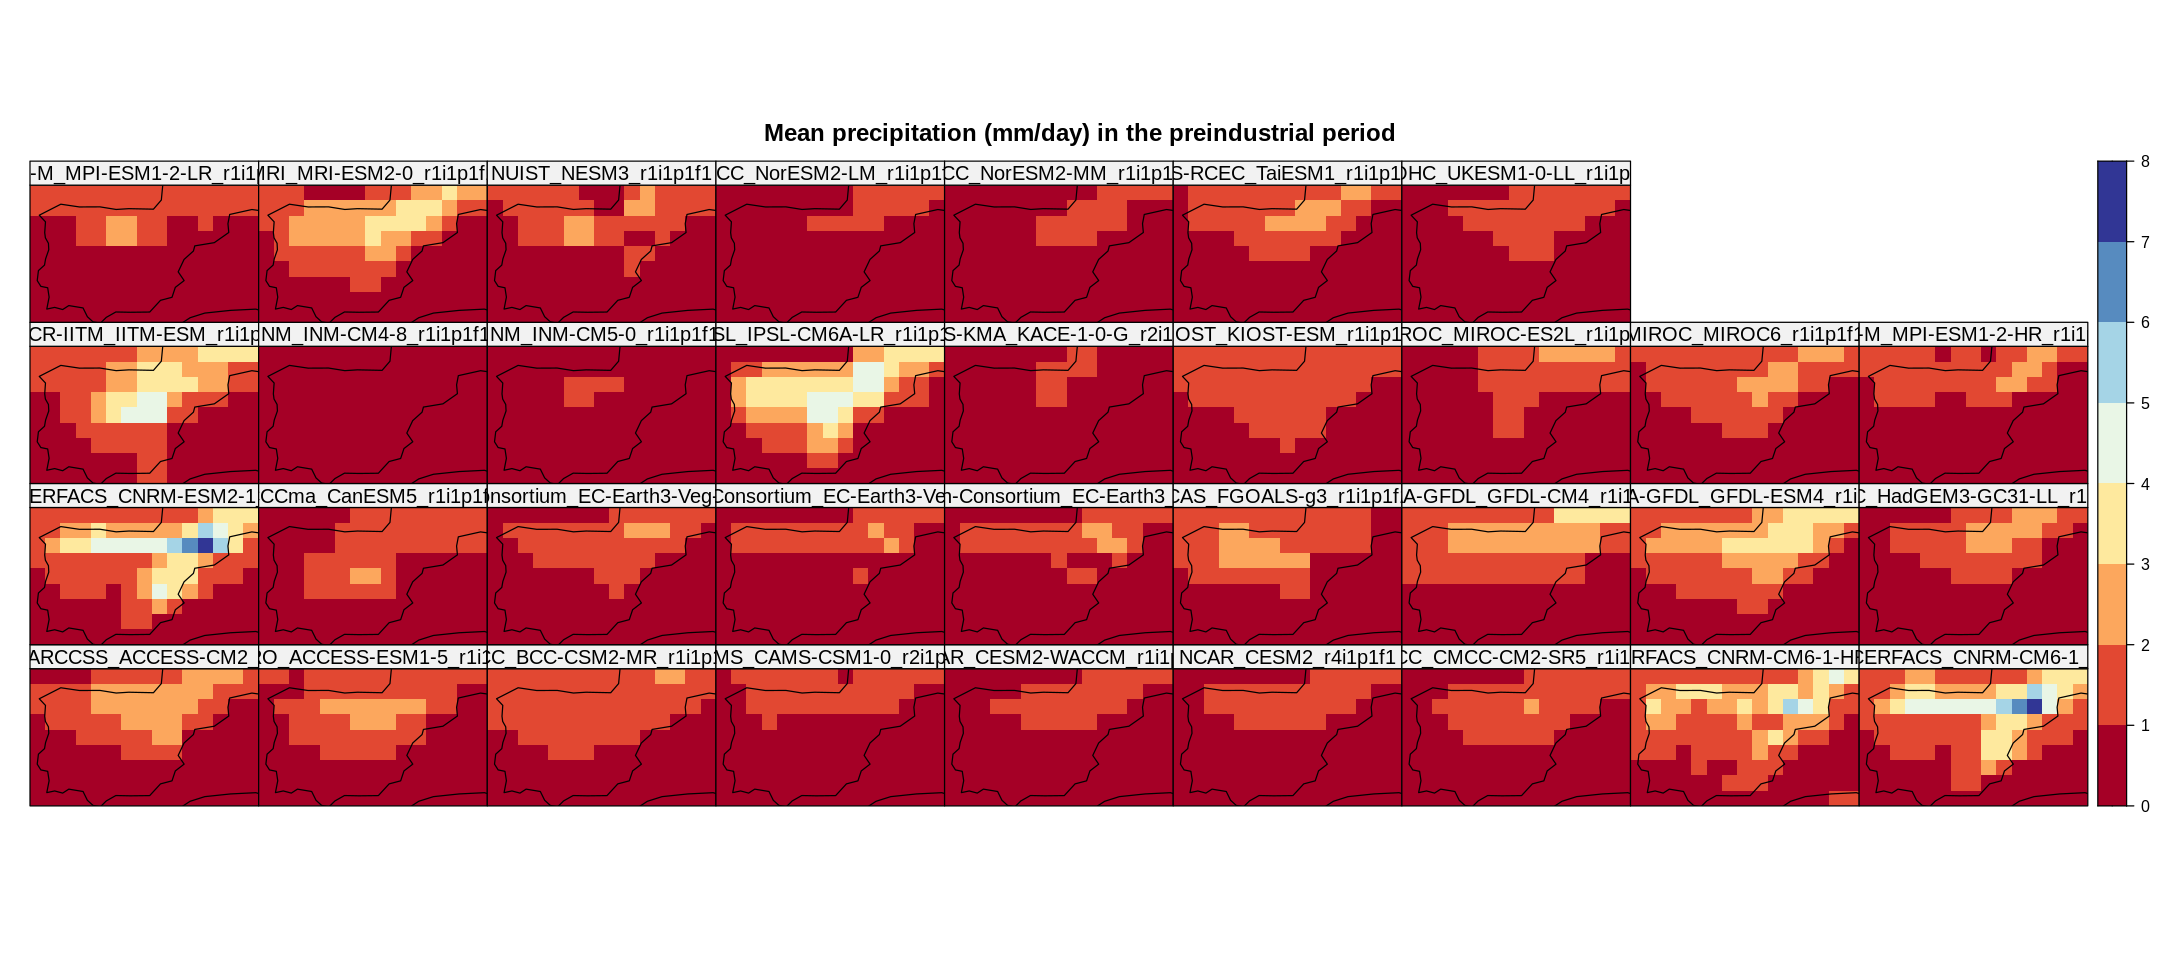

In [12]:
cmip6.hist.c <- climatology(cmip6.hist) 
spatialPlot(cmip6.hist.c, 
            backdrop.theme = "coastline", 
            at = seq(0, 8),
            set.max = 8, set.min = 0,
            layout = c(9, 4),
            main = "Mean precipitation (mm/day) in the preindustrial period",
            strip = strip.custom(factor.levels = cmip6.hist.c$Members))

We could also display the temporal series with `temporalPlot`, for the original monthly values...

pad applied on the interval: month



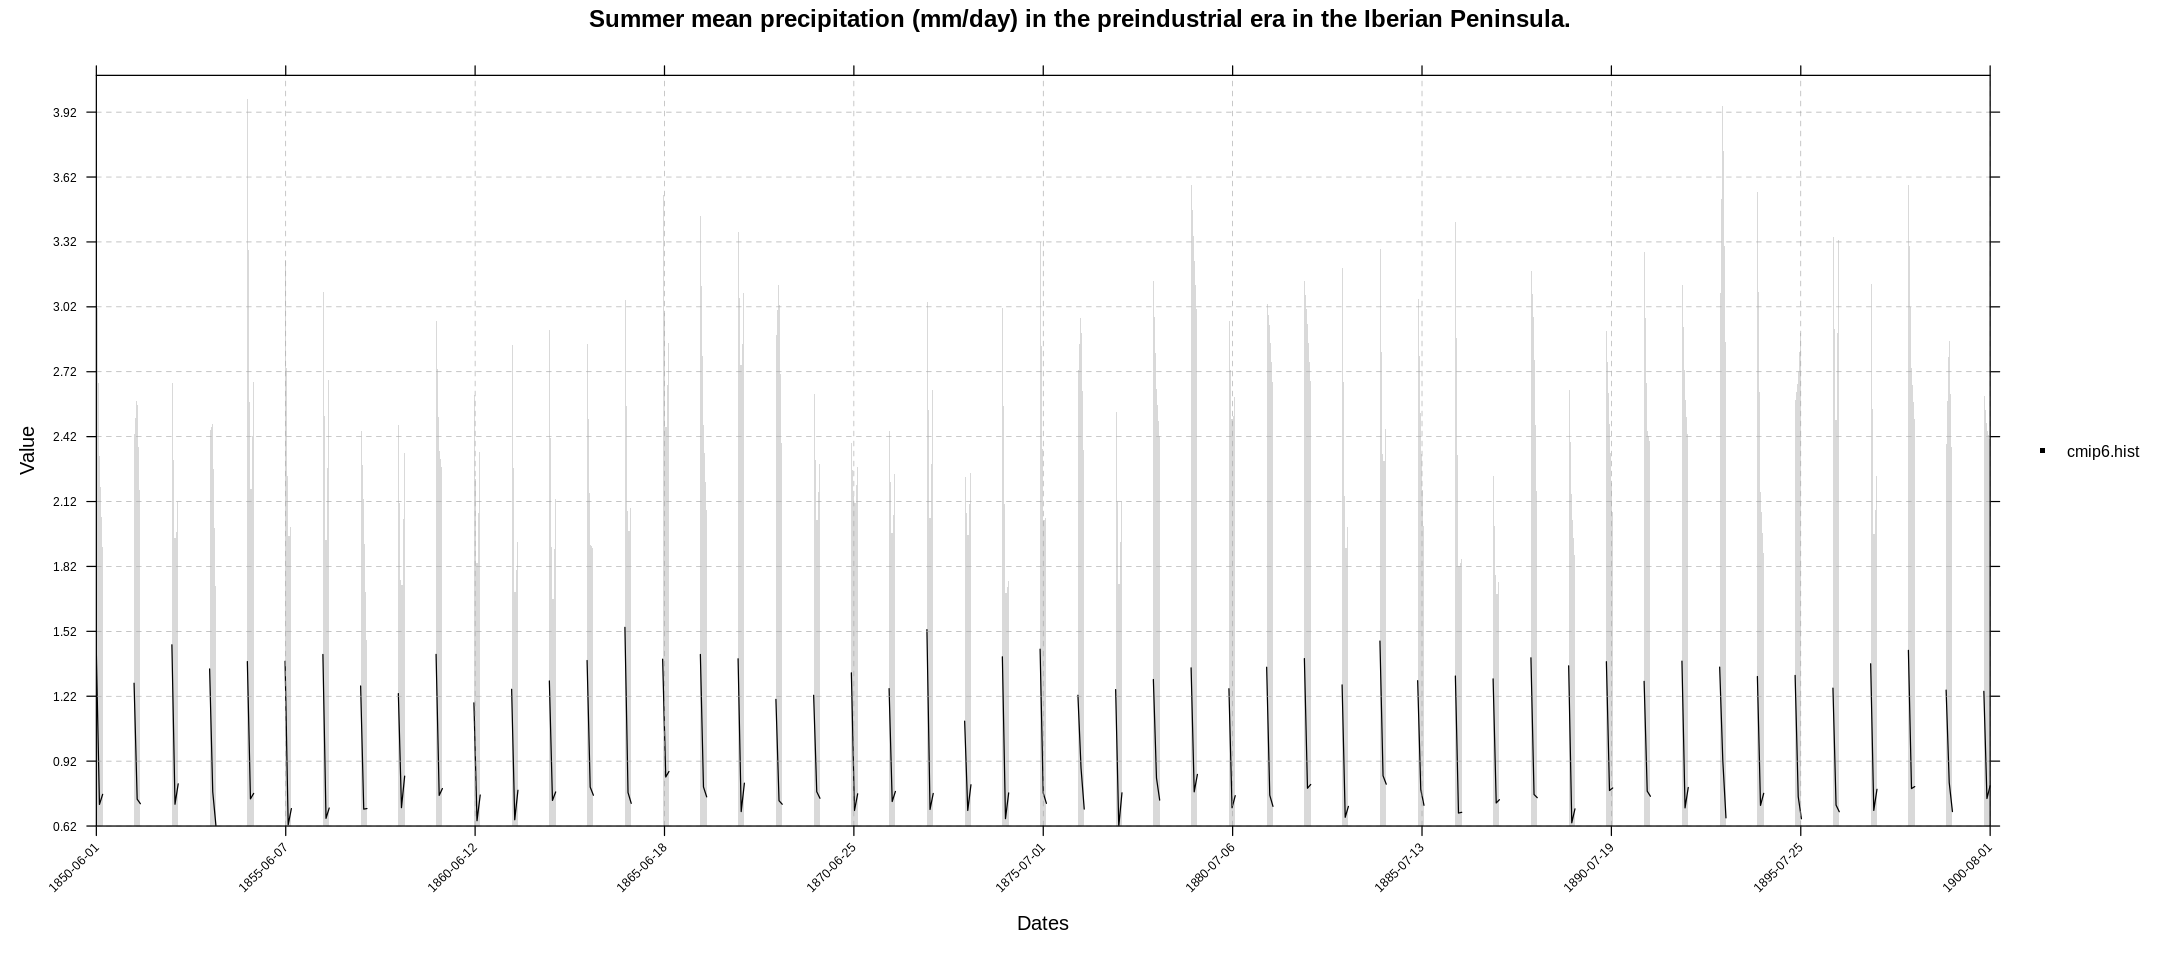

In [13]:
temporalPlot(cmip6.hist, xyplot.custom = list(main = "Summer mean precipitation (mm/day) in the preindustrial era in the Iberian Peninsula."))

...or the aggregated yearly values by previously applying the `aggregateGrid` function (we will change the color this time, run `help(temporalPlot)` for further customization):

[2024-10-04 11:03:15.534971] Performing annual aggregation...

[2024-10-04 11:03:16.710187] Done.

pad applied on the interval: year



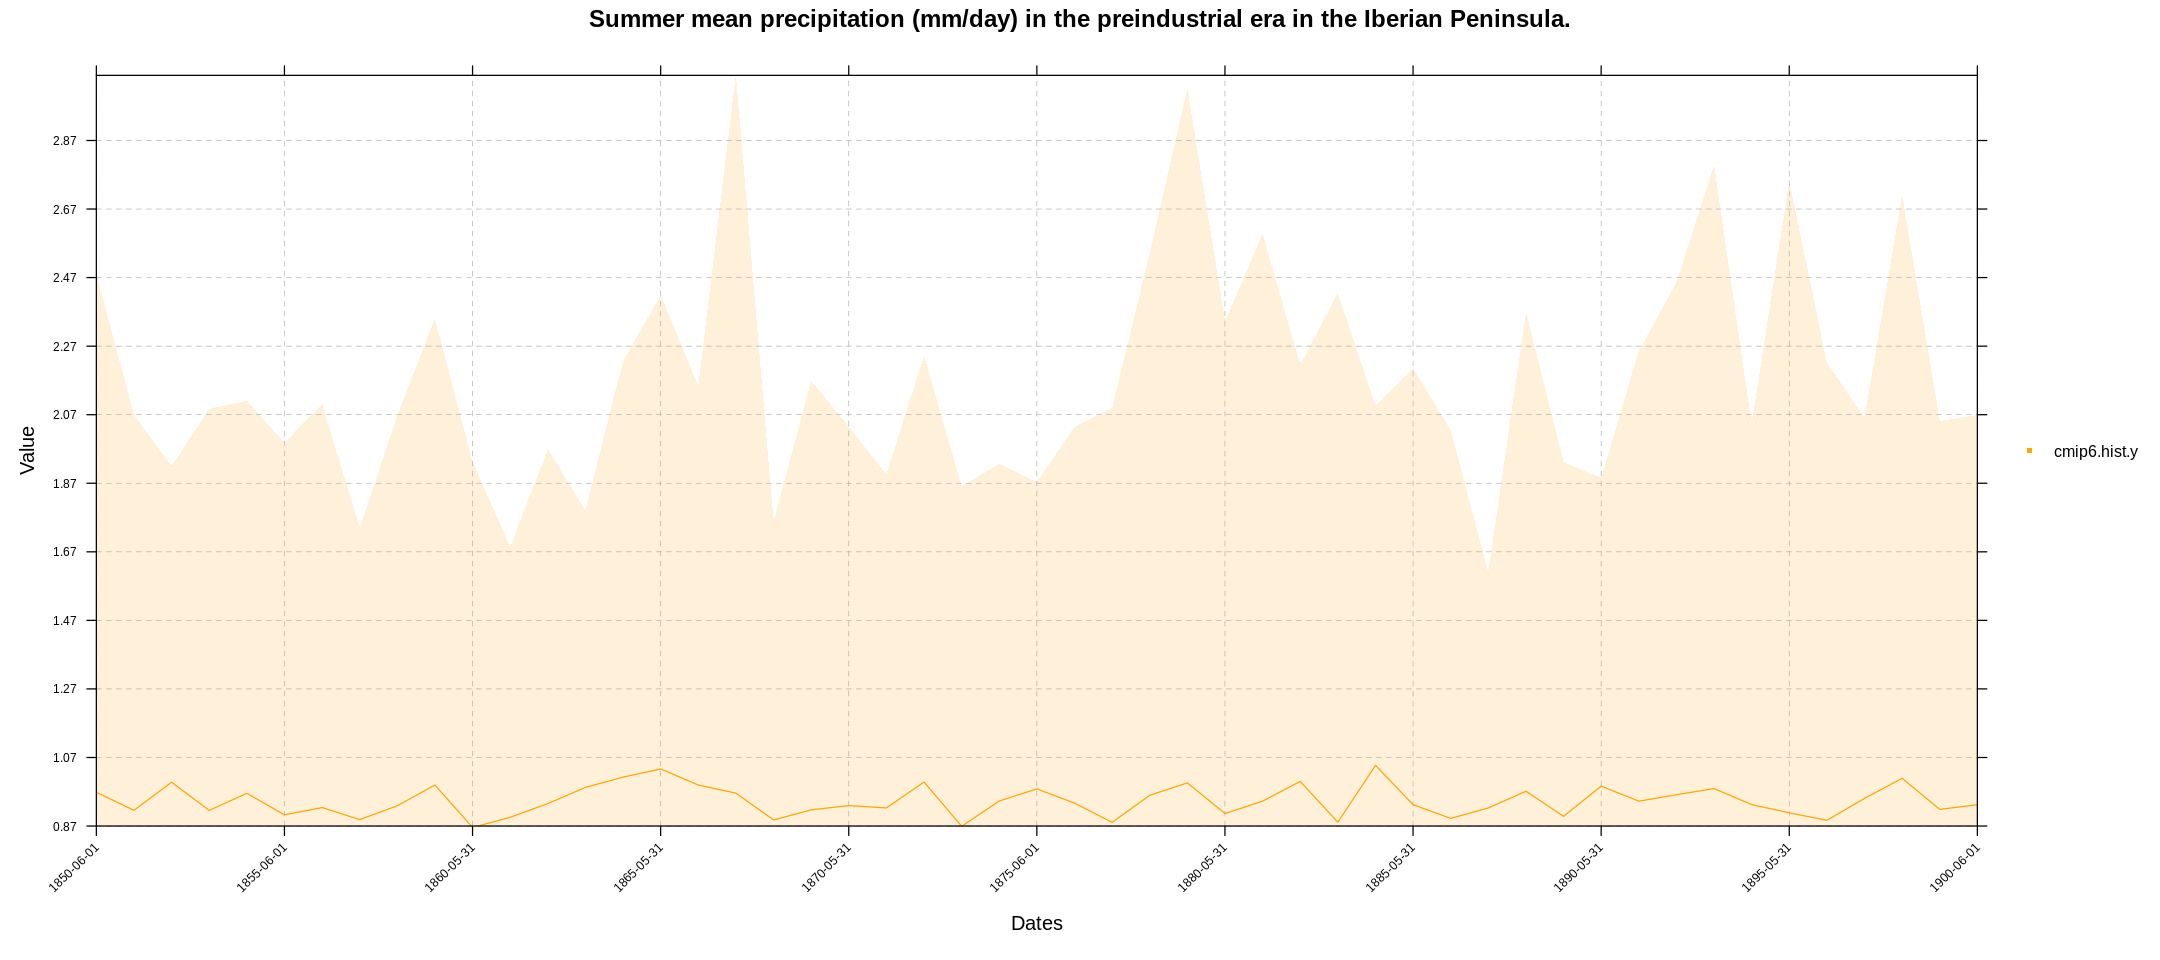

In [14]:
cmip6.hist.y <- aggregateGrid(cmip6.hist, aggr.y = list(FUN = "mean", na.rm = T))
temporalPlot(cmip6.hist.y, 
             cols = "orange",
             xyplot.custom = list(main = "Summer mean precipitation (mm/day) in the preindustrial era in the Iberian Peninsula."))

Note that the `temporalPlot` function recognizes that **our grid is multi-member (multi-model in this case)** and shows the ensemble mean (solid line) and the multi-member spread (shadow).

#### 3.5. Calculation of anomalies (future projections - historical simulations)

We will now calculate the relative precipitation anomaly of a fixed future period (e.g. 2041-2060) relative to the preindustrial period. We will consider the SSP585 mitigation scenario. Therefore, we now point to another NcML file:

In [15]:
subset <- subset(df, project == "CMIP6" & variable == "pr" & experiment == "ssp585" & type == "opendap")
location <- subset$location

cmip6.fut <- loadGridData(location,
             var = "pr",
             lonLim = c(-10, 4), latLim = c(36, 44),
             season = 6:8,
             years = 2041:2060)

[2024-10-04 11:03:17.041462] Opening dataset...

[2024-10-04 11:03:17.4836] The dataset was successfuly opened

[2024-10-04 11:03:17.486302] Defining geo-location parameters

[2024-10-04 11:03:17.528099] Defining time selection parameters

[2024-10-04 11:03:17.546398] Retrieving data subset ...

[2024-10-04 11:03:22.646217] Done



We can combine the output with the historical data in the same time-series plot:

[2024-10-04 11:03:22.664625] Performing annual aggregation...

[2024-10-04 11:03:23.152916] Done.

pad applied on the interval: year

pad applied on the interval: year



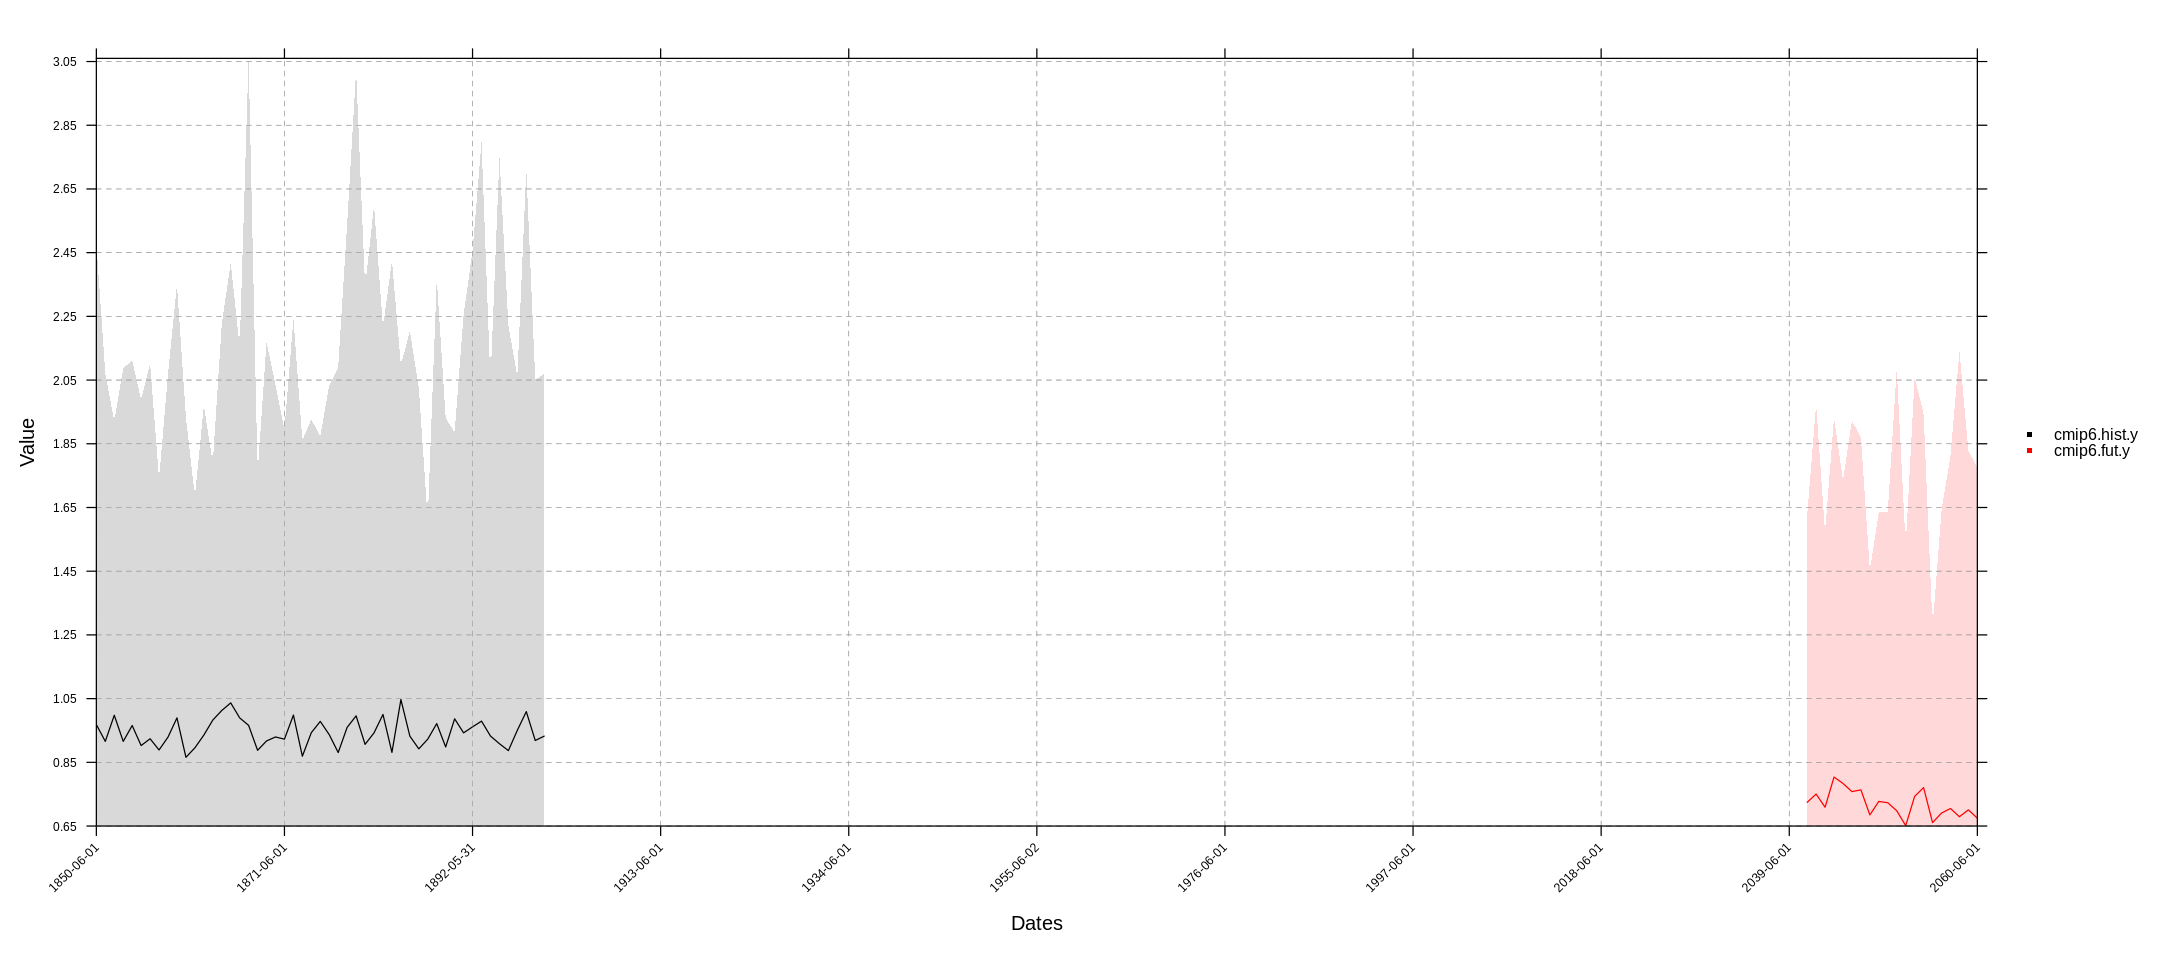

In [16]:
cmip6.fut.y <- aggregateGrid(cmip6.fut, aggr.y = list(FUN = "mean", na.rm = T))
temporalPlot(cmip6.hist.y, cmip6.fut.y)

Lets calculate the anomaly. To do so, we must retain the common available members in both grids. These are de members (CMIP6 models) in the historical period:

In [17]:
cmip6.hist$Members

[1] "CSIRO-ARCCSS_ACCESS-CM2_r1i1p1f1"             
 [2] "CSIRO_ACCESS-ESM1-5_r1i1p1f1"                 
 [3] "BCC_BCC-CSM2-MR_r1i1p1f1"                     
 [4] "CAMS_CAMS-CSM1-0_r2i1p1f1"                    
 [5] "NCAR_CESM2-WACCM_r1i1p1f1"                    
 [6] "NCAR_CESM2_r4i1p1f1"                          
 [7] "CMCC_CMCC-CM2-SR5_r1i1p1f1"                   
 [8] "CNRM-CERFACS_CNRM-CM6-1-HR_r1i1p1f2"          
 [9] "CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2"             
[10] "CNRM-CERFACS_CNRM-ESM2-1_r1i1p1f2"            
[11] "CCCma_CanESM5_r1i1p1f1"                       
[12] "EC-Earth-Consortium_EC-Earth3-Veg-LR_r1i1p1f1"
[13] "EC-Earth-Consortium_EC-Earth3-Veg_r1i1p1f1"   
[14] "EC-Earth-Consortium_EC-Earth3_r1i1p1f1"       
[15] "CAS_FGOALS-g3_r1i1p1f1"                       
[16] "NOAA-GFDL_GFDL-CM4_r1i1p1f1"                  
[17] "NOAA-GFDL_GFDL-ESM4_r1i1p1f1"                 
[18] "MOHC_HadGEM3-GC31-LL_r1i1p1f3"                
[19] "CCCR-IITM_IITM-ESM_r1i1p1f1"                  
[20] "INM_INM-CM4-8_r1i1p1f1"                       
[21] "INM_INM-CM5-0_r1i1p1f1"                       
[22] "IPSL_IPSL-CM6A-LR_r1i1p1f1"                   
[23] "NIMS-KMA_KACE-1-0-G_r2i1p1f1"                 
[24] "KIOST_KIOST-ESM_r1i1p1f1"                     
[25] "MIROC_MIROC-ES2L_r1i1p1f2"                    
[26] "MIROC_MIROC6_r1i1p1f1"                        
[27] "MPI-M_MPI-ESM1-2-HR_r1i1p1f1"                 
[28] "MPI-M_MPI-ESM1-2-LR_r1i1p1f1"                 
[29] "MRI_MRI-ESM2-0_r1i1p1f1"                      
[30] "NUIST_NESM3_r1i1p1f1"                         
[31] "NCC_NorESM2-LM_r1i1p1f1"                      
[32] "NCC_NorESM2-MM_r1i1p1f1"                      
[33] "AS-RCEC_TaiESM1_r1i1p1f1"                     
[34] "MOHC_UKESM1-0-LL_r1i1p1f2"

and these in the future period for the SSP585 scenario:

In [18]:
cmip6.fut$Members

[1] "CSIRO-ARCCSS_ACCESS-CM2_r1i1p1f1"          
 [2] "CSIRO_ACCESS-ESM1-5_r1i1p1f1"              
 [3] "BCC_BCC-CSM2-MR_r1i1p1f1"                  
 [4] "CAMS_CAMS-CSM1-0_r2i1p1f1"                 
 [5] "NCAR_CESM2-WACCM_r1i1p1f1"                 
 [6] "NCAR_CESM2_r4i1p1f1"                       
 [7] "CMCC_CMCC-CM2-SR5_r1i1p1f1"                
 [8] "CNRM-CERFACS_CNRM-CM6-1-HR_r1i1p1f2"       
 [9] "CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2"          
[10] "CNRM-CERFACS_CNRM-ESM2-1_r1i1p1f2"         
[11] "CCCma_CanESM5_r1i1p1f1"                    
[12] "EC-Earth-Consortium_EC-Earth3-Veg_r1i1p1f1"
[13] "EC-Earth-Consortium_EC-Earth3_r1i1p1f1"    
[14] "CAS_FGOALS-g3_r1i1p1f1"                    
[15] "NOAA-GFDL_GFDL-CM4_r1i1p1f1"               
[16] "NOAA-GFDL_GFDL-ESM4_r1i1p1f1"              
[17] "MOHC_HadGEM3-GC31-LL_r1i1p1f3"             
[18] "CCCR-IITM_IITM-ESM_r1i1p1f1"               
[19] "INM_INM-CM4-8_r1i1p1f1"                    
[20] "INM_INM-CM5-0_r1i1p1f1"                    
[21] "IPSL_IPSL-CM6A-LR_r1i1p1f1"                
[22] "NIMS-KMA_KACE-1-0-G_r2i1p1f1"              
[23] "KIOST_KIOST-ESM_r1i1p1f1"                  
[24] "MIROC_MIROC-ES2L_r1i1p1f2"                 
[25] "MIROC_MIROC6_r1i1p1f1"                     
[26] "MPI-M_MPI-ESM1-2-HR_r1i1p1f1"              
[27] "MPI-M_MPI-ESM1-2-LR_r1i1p1f1"              
[28] "MRI_MRI-ESM2-0_r1i1p1f1"                   
[29] "NUIST_NESM3_r1i1p1f1"                      
[30] "NCC_NorESM2-LM_r1i1p1f1"                   
[31] "NCC_NorESM2-MM_r1i1p1f1"                   
[32] "AS-RCEC_TaiESM1_r1i1p1f1"                  
[33] "MOHC_UKESM1-0-LL_r1i1p1f2"

As is the case in this example, different scenarios for different variables may have less members than the corresponding historical experiment. We can therefore subset the historical grid to match the members with the future grid. An easy way to retain the common members in both grids is to use the function `intersectGrid` (which also allows for spatial and temporal intersections, by changing the value in the `type` argument):

In [19]:
cmip6.common.mems <- intersectGrid(cmip6.hist, cmip6.fut, type = "members", which.return = 1:2)
cmip6.hist.s <- cmip6.common.mems[[1]] ; cmip6.fut <- cmip6.common.mems[[2]]

It is always a good practice to make sure that the members in both grids are identical:

In [20]:
identical(cmip6.hist.s$Members, cmip6.fut$Members)

[1] TRUE

Now we can calculate the anomaly by computing the difference between both climatologies:

In [21]:
anom <- gridArithmetics(climatology(cmip6.fut), climatology(cmip6.hist.s), operator = "-")

[2024-10-04 11:03:23.424937] - Computing climatology...

[2024-10-04 11:03:23.467267] - Done.

[2024-10-04 11:03:23.47272] - Computing climatology...

[2024-10-04 11:03:23.602778] - Done.



We can calculate the relative anomaly the same way:

In [22]:
rel.anom <- gridArithmetics(anom, climatology(cmip6.hist.s), 100, operator = c("/", "*"))

[2024-10-04 11:03:23.621291] - Computing climatology...

[2024-10-04 11:03:23.657197] - Done.



Finally, we can plot the output using an appropriate palette for the `color.theme`:

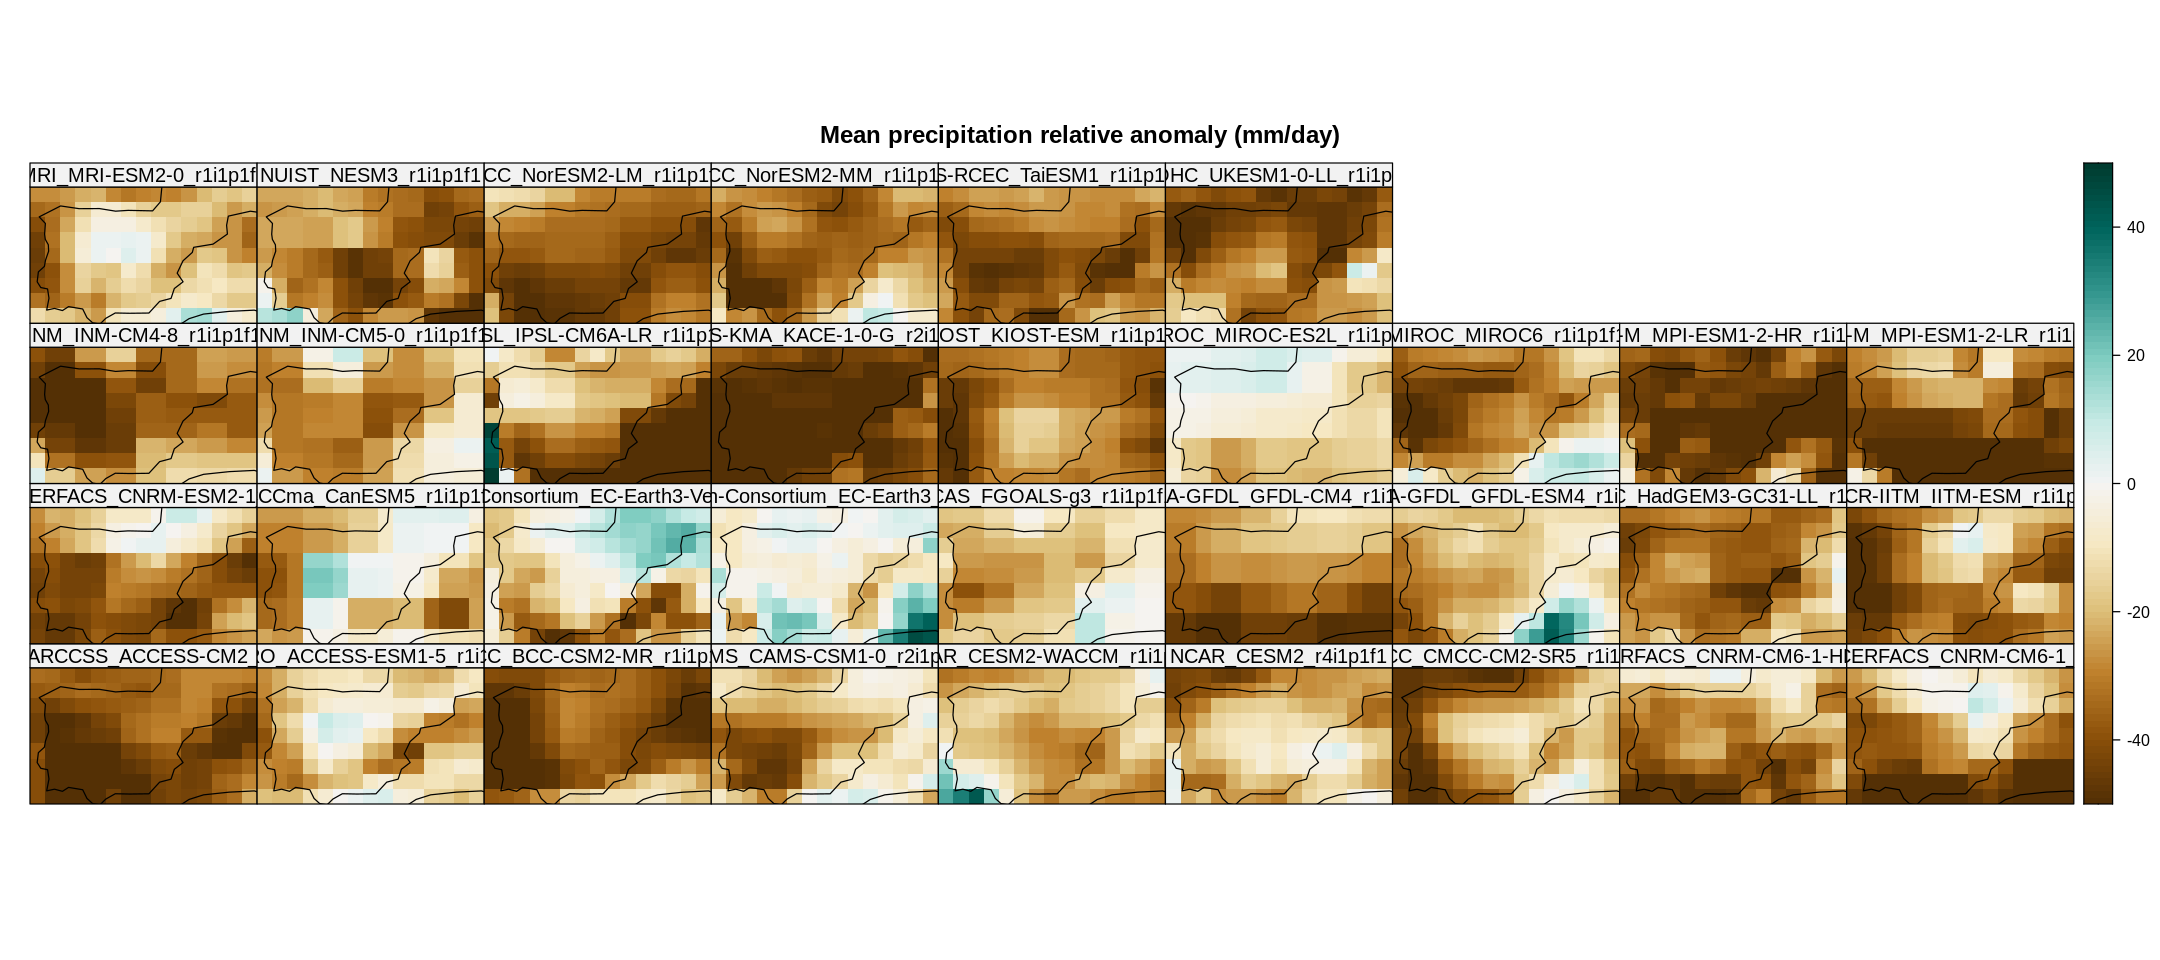

In [23]:
spatialPlot(rel.anom, 
            color.theme = "BrBG",
            backdrop.theme = "coastline", 
            at = seq(-50, 50),
            set.max = 50, set.min = -50,
            layout = c(9, 4),
            main = "Mean precipitation relative anomaly (mm/day)",
            strip = strip.custom(factor.levels = cmip6.fut$Members))

We can do the same for the multi-model ensemble mean by previously applying the `aggregateGrid` function:

[2024-10-04 11:03:26.630651] - Aggregating members...

[2024-10-04 11:03:26.632568] - Done.



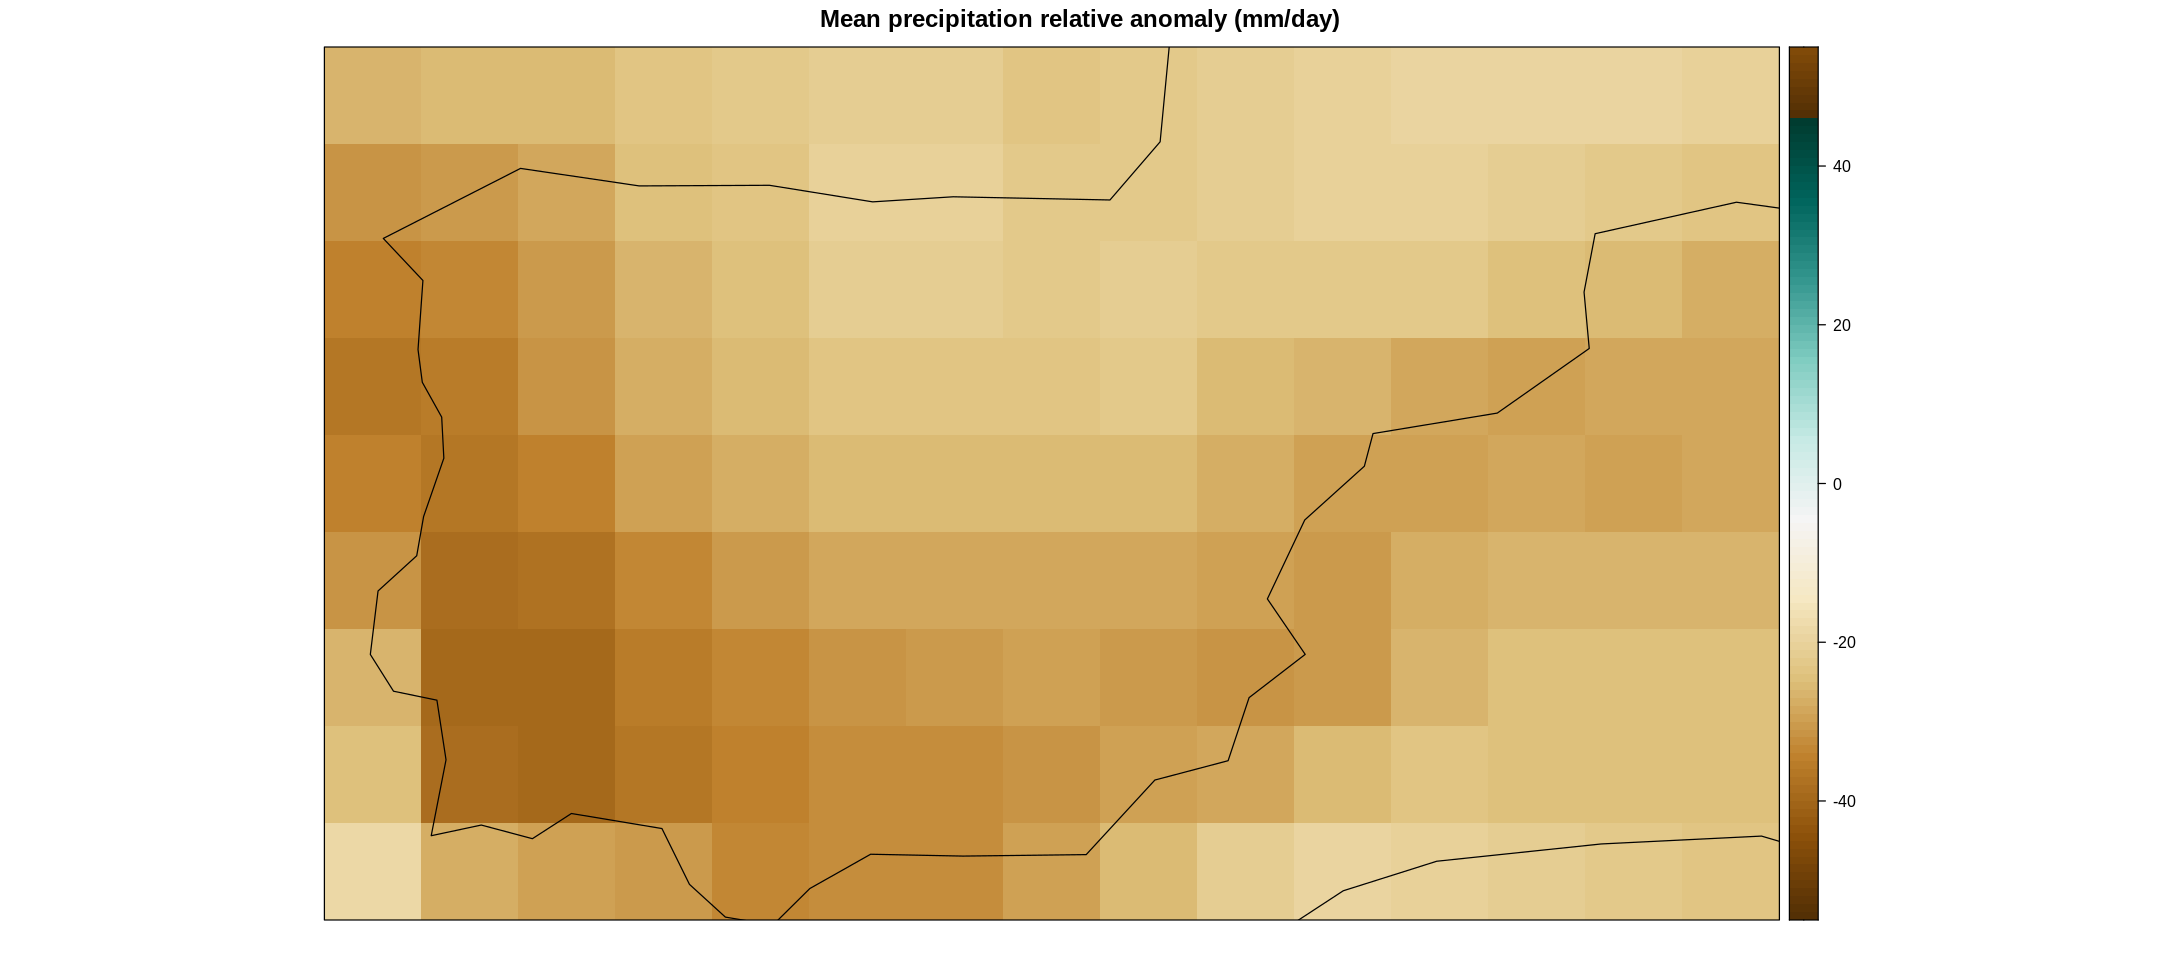

In [24]:
ens.mean.anom <- aggregateGrid(rel.anom, aggr.mem = list(FUN = "mean", na.rm = TRUE))
spatialPlot(ens.mean.anom, 
            color.theme = "BrBG",
            backdrop.theme = "coastline", 
            at = seq(-55, 55),
            set.max = 55, set.min = -55,
            main = "Mean precipitation relative anomaly (mm/day)",
            strip = strip.custom(factor.levels = cmip6.fut$Members))

#### 3.6. Spatial aggregation

The time series plots we have created above, automatically performs spatial aggregations. However, we can control this operation by using the `aggr.spatial` parameter in the `aggregateGrid` function, which by default calculates weighted values according to the latitude. If we aggregate the `rel.anom` object, we will get a single value per model (member). 

In [25]:
rel.anom.regional_mean <- aggregateGrid(rel.anom, aggr.spatial = list(FUN = "mean", na.rm = TRUE))

Calculating areal weights...

[2024-10-04 11:03:26.828065] - Aggregating spatially...

[2024-10-04 11:03:26.829848] - Done.



In the next code chunk we get the multi-model mean and the percentiles:

In [26]:
m <- aggregateGrid(rel.anom.regional_mean, aggr.mem = list(FUN = "mean", na.rm = TRUE)) 
p25 <- aggregateGrid(rel.anom.regional_mean, aggr.mem = list(FUN = "quantile", prob = 0.25, na.rm = TRUE)) 
p75 <- aggregateGrid(rel.anom.regional_mean, aggr.mem = list(FUN = "quantile", prob = 0.75, na.rm = TRUE)) 

c("mean" = m$Data, "P25" = p25$Data, "P75" = p75$Data)

[2024-10-04 11:03:26.842957] - Aggregating members...

[2024-10-04 11:03:26.844216] - Done.

[2024-10-04 11:03:26.846391] - Aggregating members...

[2024-10-04 11:03:26.848867] - Done.

[2024-10-04 11:03:26.856458] - Aggregating members...

[2024-10-04 11:03:26.857935] - Done.



mean       P25       P75 
-27.24757 -34.66964 -17.87178

At this stage it is easy to operate directly with the data array and use other `R` functionalities, for instance:

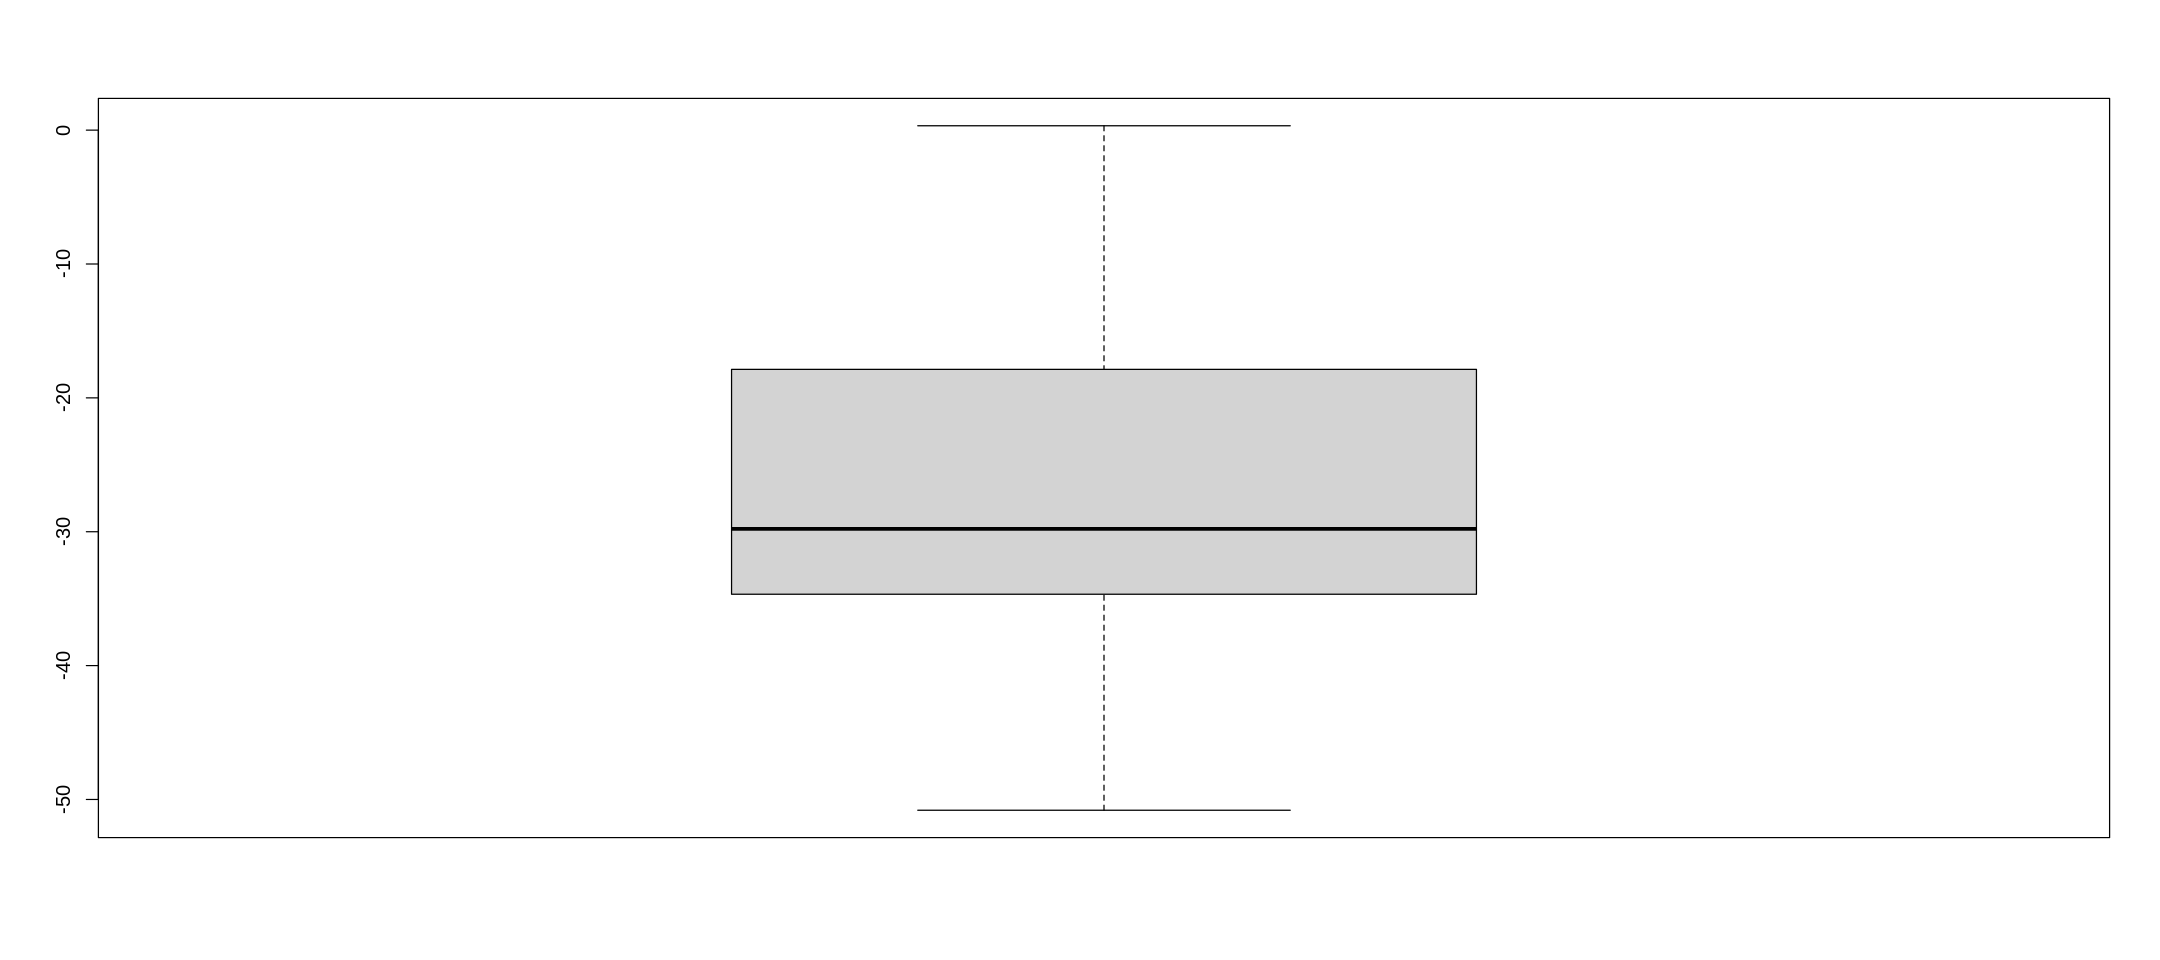

In [27]:
boxplot(rel.anom.regional_mean$Data)

The ***climate4R* framework provides many other spatial and temporal operations functionalities**, such as **interpolation or subsetting**. It also provides functionalities for **bias correction and downscaling** (see Iturbide et al., 2019. DOI: [10.1016/j.envsoft.2018.09.009](https://www.sciencedirect.com/science/article/pii/S1364815218303049?via%3Dihub)). 

***

### Session Info

In [28]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS/LAPACK: /home/zequi/miniconda3/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=es_ES.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=es_ES.UTF-8       LC_MESSAGES=en_US.UTF-8      
 [7] LC_PAPER=es_ES.UTF-8          LC_NAME=es_ES.UTF-8          
 [9] LC_ADDRESS=es_ES.UTF-8        LC_TELEPHONE=es_ES.UTF-8     
[11] LC_MEASUREMENT=es_ES.UTF-8    LC_IDENTIFICATION=es_ES.UTF-8

time zone: Europe/Madrid
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] magrittr_2.0.3      lattice_0.22-6      visualizeR_1.6.4   
[4] transformeR_2.2.2   loadeR_1.8.2        climate4R.UDG_0.2.6
[7] loadeR.java_1.1.1   rJava_1.0-11        repr_1.1.7         

loaded vi